# Data Set Information:

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

# Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.

Name / Data Type / Measurement Unit / Description
-----------------------------
1. Sex / nominal / -- / M, F, and I (infant)
2. Length / continuous / mm / Longest shell measurement
3. Diameter / continuous / mm / perpendicular to length
4. Height / continuous / mm / with meat in shell
5. Whole weight / continuous / grams / whole abalone
6. Shucked weight / continuous / grams / weight of meat
7. Viscera weight / continuous / grams / gut weight (after bleeding)
8. Shell weight / continuous / grams / after being dried
9. Rings / integer / -- / +1.5 gives the age in years

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Dataset

In [3]:
aba = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
aba.head(20)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [4]:
aba.shape

(4177, 9)


# Type Of Problem :- 

We can see that we have data regarding abalone's varioud feature and we have to predict age which is rings +1.5. So we have numerical and continous values in the dataset, rings column. So, we will proceed further with Linear regression. 

In [5]:
print("Below is the detailed information of your project")
print('\n')
aba.info()

Below is the detailed information of your project


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


From here we can see that we have all the values in float64 Dtype and no null values in any columns. Also, we can check that we have a columns sex with object(string) values. So, we need to convert those values to numerical form by encoder. 

We can see that there aren't any null values in our dataset. 

In [6]:
aba.describe(include = 'all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


In [7]:
aba.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Fortunately, there are no missing values in this dataset. We will now proceed to analyze this dataset, observe patterns, and identify outliers with the help of graphs and figures.

# Explanatory Data Analysis

In [8]:
col = aba.columns
col

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

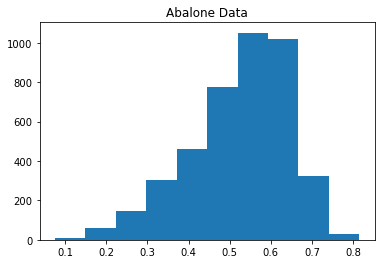

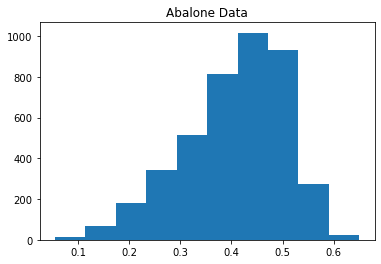

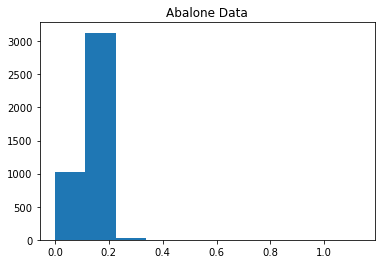

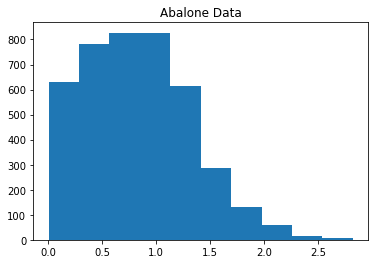

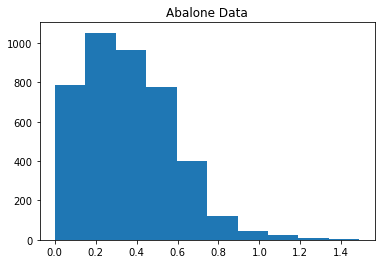

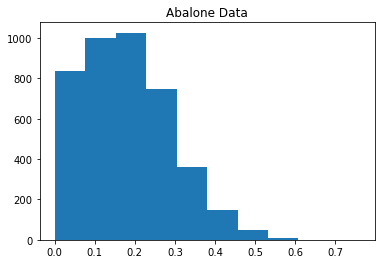

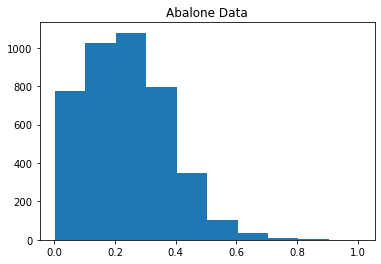

In [9]:
for i in col[1:8]:
    plt.hist(aba[i])
    plt.title('Abalone Data')
    plt.show()

{'bodies': [<matplotlib.collections.PolyCollection object at 0x000001D3840B7AC0>], 'cmaxes': <matplotlib.collections.LineCollection object at 0x000001D3840B78E0>, 'cmins': <matplotlib.collections.LineCollection object at 0x000001D3840B7940>, 'cbars': <matplotlib.collections.LineCollection object at 0x000001D3840CD2B0>}
{'bodies': [<matplotlib.collections.PolyCollection object at 0x000001D3840CD700>], 'cmaxes': <matplotlib.collections.LineCollection object at 0x000001D3840B7910>, 'cmins': <matplotlib.collections.LineCollection object at 0x000001D3840CDBB0>, 'cbars': <matplotlib.collections.LineCollection object at 0x000001D3840CDEB0>}
{'bodies': [<matplotlib.collections.PolyCollection object at 0x000001D3840DB340>], 'cmaxes': <matplotlib.collections.LineCollection object at 0x000001D3840CD5B0>, 'cmins': <matplotlib.collections.LineCollection object at 0x000001D3840DB7F0>, 'cbars': <matplotlib.collections.LineCollection object at 0x000001D3840DBAF0>}
{'bodies': [<matplotlib.collections.P

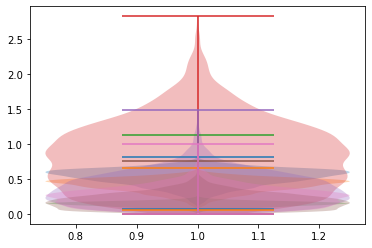

In [10]:
for i in col[1:8]:
    print(plt.violinplot(aba[i]))

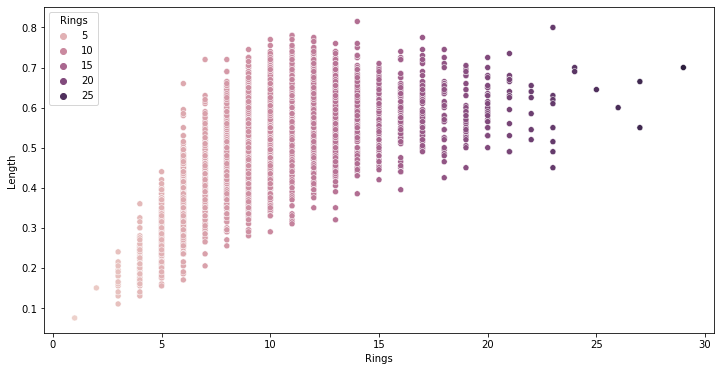

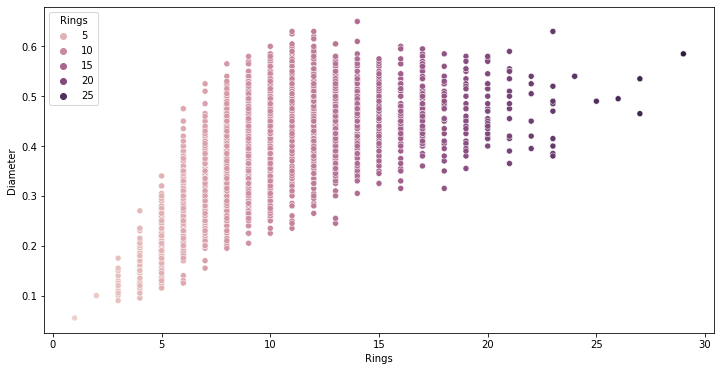

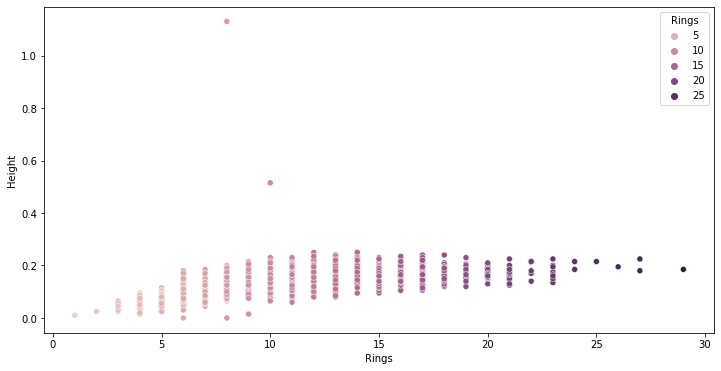

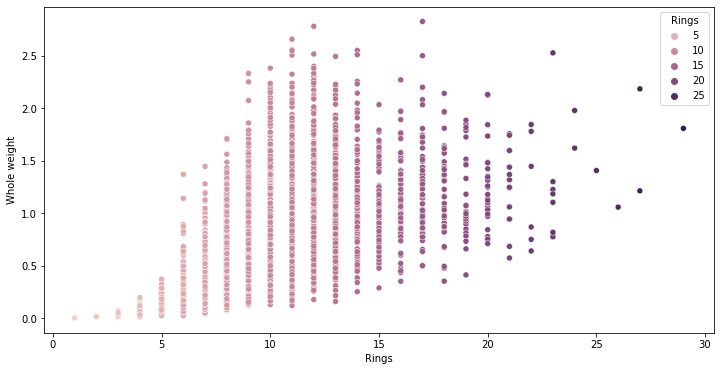

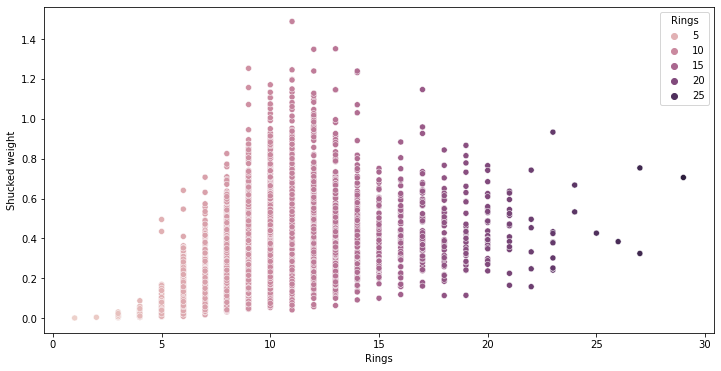

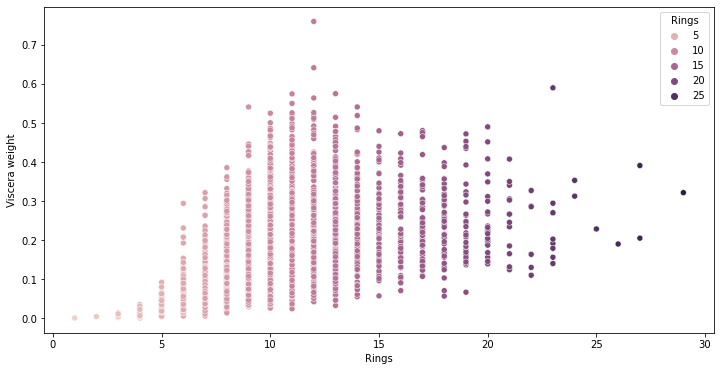

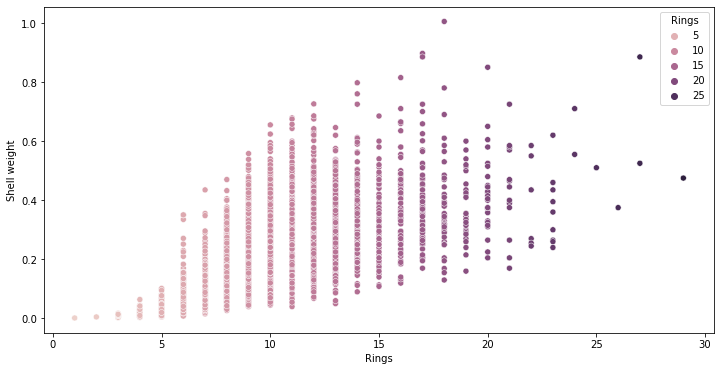

In [11]:
for i in col[1:8]:
    plt.figure(figsize = (12,6))
    sns.scatterplot(x = 'Rings' , y = i , data = aba, hue = aba['Rings'])
    plt.show()

We can see that all the input variables are directly related to the output rings. Also, we can check that the ring size is gradually increasing for a limited age and then it is static. 

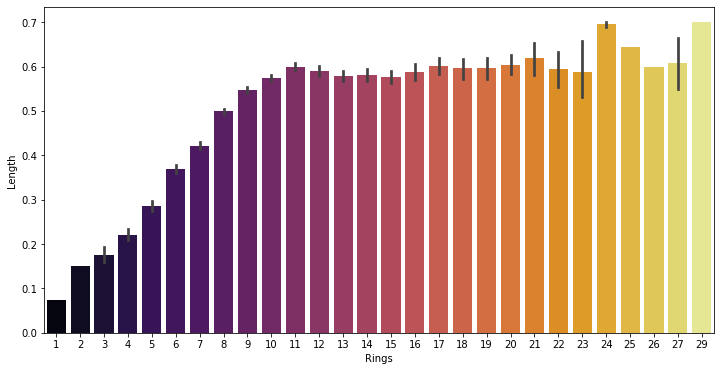

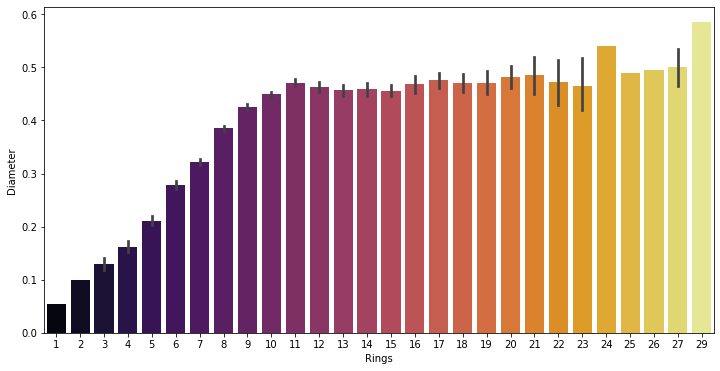

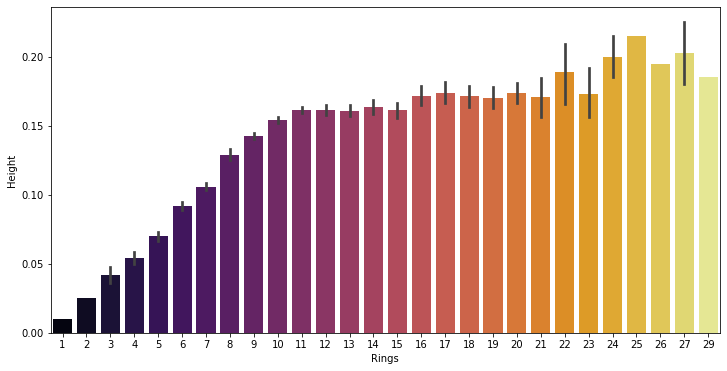

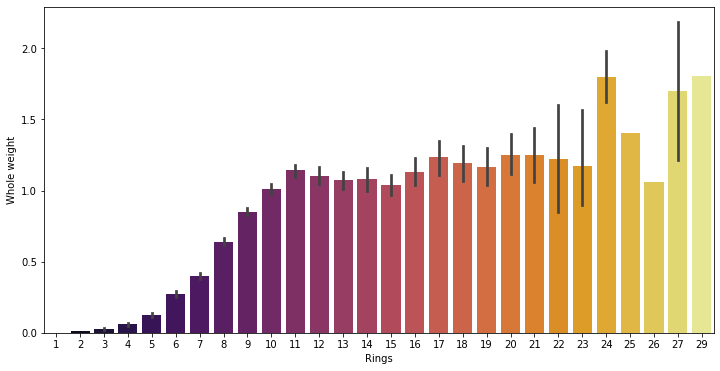

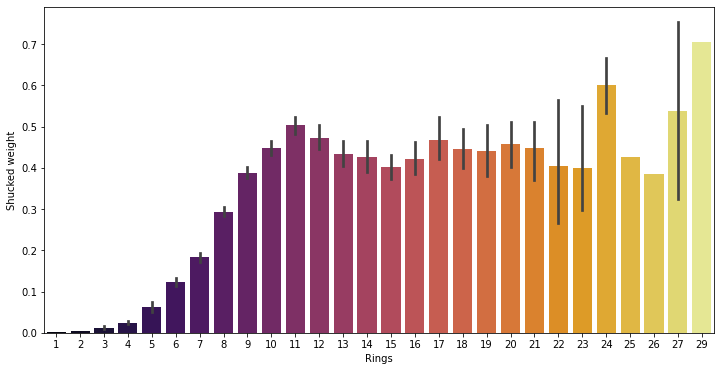

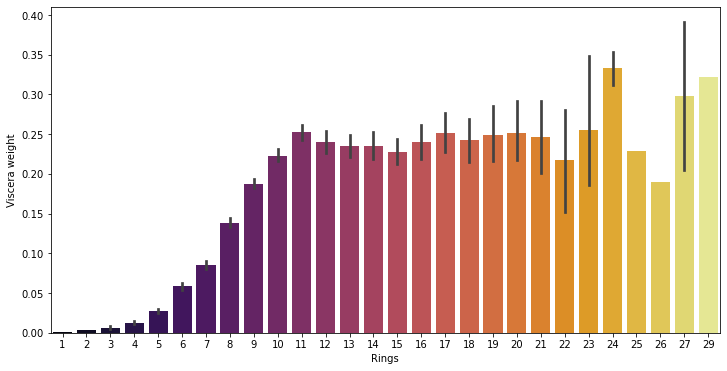

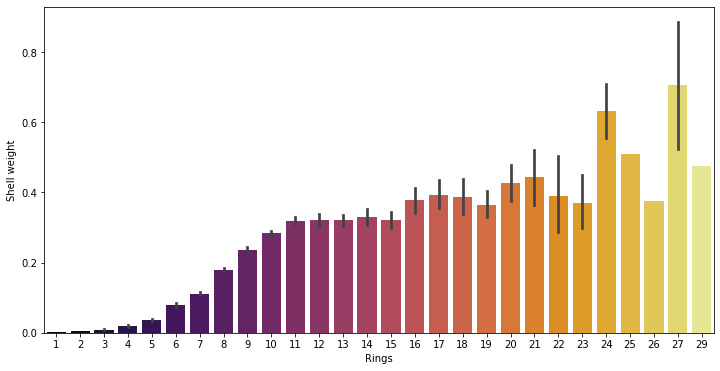

In [12]:
for i in col[1:8]:
    plt.figure(figsize = (12,6))
    sns.barplot(x='Rings' , y=i , data=aba , palette='inferno')
    plt.show

From the above graphs we can check that all the factore are directly related to rings, as their values increases so the rings. MOre rings more age. 

<function matplotlib.pyplot.show(close=None, block=None)>

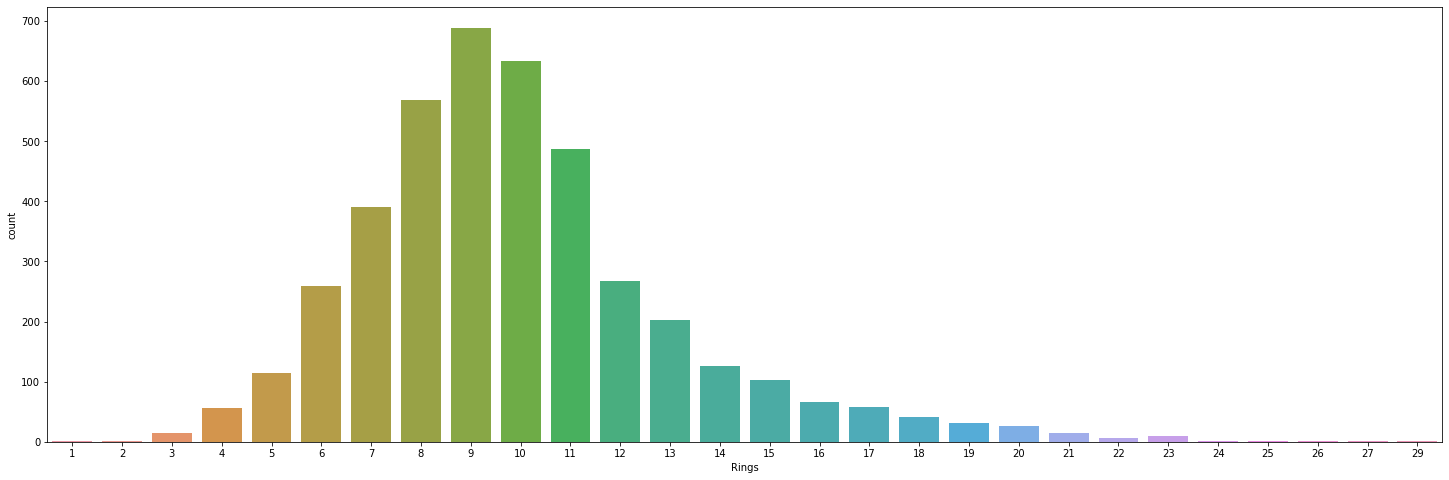

In [13]:
plt.figure(figsize = (25,8))
sns.countplot(aba['Rings'])
plt.show

Here we can see tha distribution of the RIngs. We can check 8 - 11 rings have highest count. 

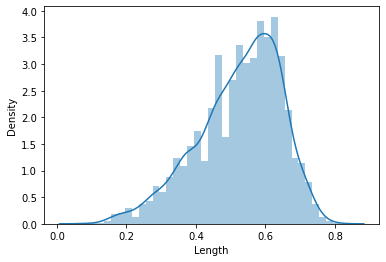

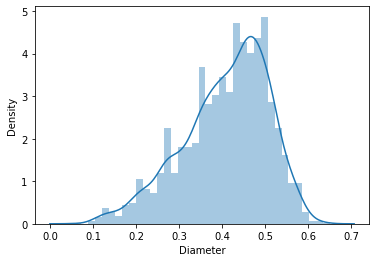

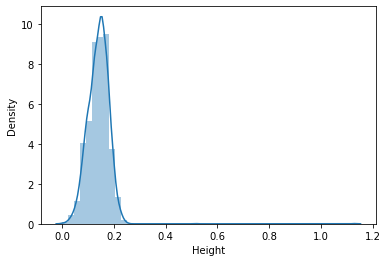

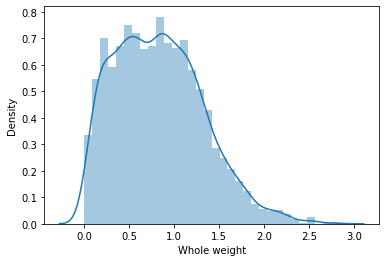

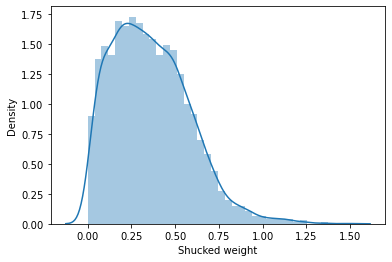

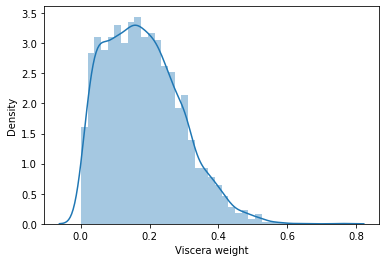

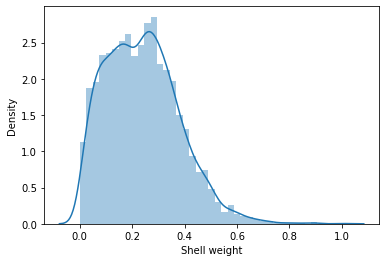

In [14]:
for i in col[1:8]:
    plt.figure()
    sns.distplot(aba[i])
    plt.show

The above distribution plot of the dataset represents the distribution of data. We can check that the data is not normally ditributed which means data is imbalanced and also having outliers in our dataset. 

In [15]:
aba

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


We have checked earlier that we don't have any Null values in our dataset. Let's proceedd to check skewness in our data. 

In [16]:
aba.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

Normal Range for skewness:-  -0.50 to +0.50. 
    We can check that Length, Diameter, Height(highly skewed), shucked weight, Viscera Weight, shell weight and Rings are skewed. The same can be observed using the Dist plot. 
    
    	Skewness
1. Fairly Symmetrical:	-0.5 to 0.5
2. Moderate Skewed: 	-0.5 to -1.0 and 0.5 to 1.0
3. Highly Skewed:  	< -1.0 and > 1.0

In [17]:
#aba['Length'] = np.log(aba['Length'])
    
#print('Before removing skewness', aba['Length'].skew())
#print("New graph :-")
#sns.distplot(aba['Length'])

The data is changed a bit but still having a left tail so will try another merthod and see if this helps. 

In [18]:
aba.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [19]:
aba.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Length,-0.639873,0.064621
Diameter,-0.609198,-0.045476
Height,3.128817,76.025509
Whole weight,0.530959,-0.023644
Shucked weight,0.719098,0.595124
Viscera weight,0.591852,0.084012
Shell weight,0.620927,0.531926
Rings,1.114102,2.330687


In [20]:
aba['Height'] = np.sqrt(aba['Height'])
aba['Whole weight'] = np.sqrt(aba['Whole weight'])
aba['Shucked weight'] = np.sqrt(aba['Shucked weight'])
aba['Viscera weight'] = np.sqrt(aba['Viscera weight'])
aba['Shell weight'] = np.sqrt(aba['Shell weight'])
aba['Rings'] = np.sqrt(aba['Rings'])

In [21]:
aba.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Length,-0.639873,0.064621
Diameter,-0.609198,-0.045476
Height,-0.295641,6.991966
Whole weight,-0.236646,-0.438395
Shucked weight,-0.141443,-0.356181
Viscera weight,-0.183321,-0.470187
Shell weight,-0.222772,-0.291502
Rings,0.471366,1.009725


Length               AxesSubplot(0.125,0.71587;0.0945122x0.16413)
Diameter          AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
Height            AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
Whole weight      AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
Shucked weight    AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
Viscera weight    AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
Shell weight      AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
Rings               AxesSubplot(0.125,0.518913;0.0945122x0.16413)
dtype: object

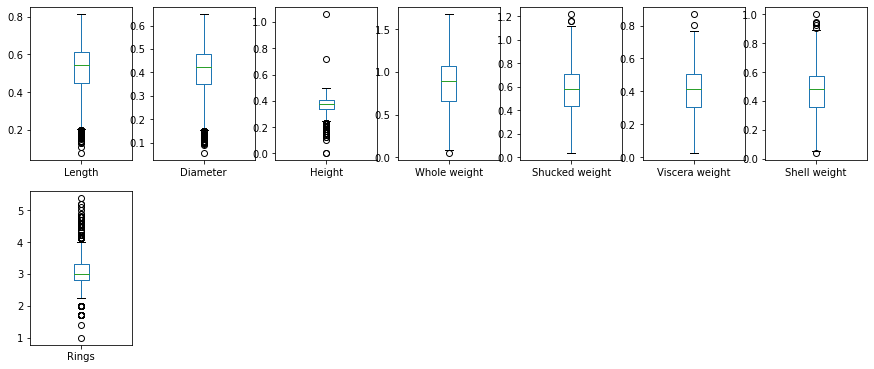

In [22]:
aba.plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

So, from the above representation of data using bar plot we can check that we have outliers in various columns. So, now we will proceed to remove outliers.

1. Length
2. Diameter
3. Height
4. Whole weight
5. Shucked weight
6. Viscera Weight
7. Shell weight
8. Rings (Label)

Will proceed further to remove the outiers. We can use:-
    
    1. Z-score
    2. IQR
    
 We will try the IQR first

25 quartile of is: 0.45
75 quartile of is: 0.615
The IQR value is: 0.16499999999999998
The high value is 0.8624999999999999
The low value is 0.20250000000000004


Length    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

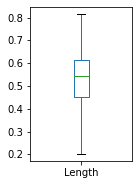

In [23]:
q1 = aba['Length'].quantile(.25)
q3 = aba['Length'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)

aba['Length'] = np.where(
    aba['Length'] > high_range,
    high_range,
    np.where(
        aba['Length'] < low_range,
        low_range,
        aba['Length']
    )
)

#checking for the same graphically using the box plot
aba['Length'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

25 quartile of is: 0.35
75 quartile of is: 0.48
The IQR value is: 0.13
The high value is 0.675
The low value is 0.15499999999999997


Diameter    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

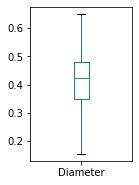

In [24]:
#2. Diameter

q1 = aba['Diameter'].quantile(.25)
q3 = aba['Diameter'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)

#removing outliers

aba['Diameter'] = np.where(
    aba['Diameter'] > high_range,
    high_range,
    np.where(
        aba['Diameter'] < low_range,
        low_range,
        aba['Diameter']
    )
)

#checking for the same graphically using the box plot
aba['Diameter'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

25 quartile of is: 0.3391164991562634
75 quartile of is: 0.406201920231798
The IQR value is: 0.06708542107553461
The high value is 0.5068300518450999
The low value is 0.2384883675429615


Height    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

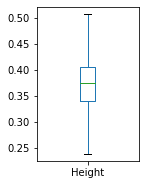

In [25]:
#3. Height
q1 = aba['Height'].quantile(.25)
q3 = aba['Height'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)

#removing outliers

aba['Height'] = np.where(
    aba['Height'] > high_range,
    high_range,
    np.where(
        aba['Height'] < low_range,
        low_range,
        aba['Height']
    )
)

#checking for the same graphically using the box plot
aba['Height'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

25 quartile of is: 0.6644546636152086
75 quartile of is: 1.0737783756436894
The IQR value is: 0.40932371202848084
The high value is 1.6877639436864107
The low value is 0.050469095572487244


Whole weight    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

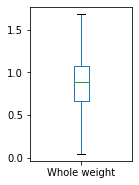

In [26]:
#4. Whole weight
q1 = aba['Whole weight'].quantile(.25)
q3 = aba['Whole weight'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)

#removing outliers

aba['Whole weight'] = np.where(
    aba['Whole weight'] > high_range,
    high_range,
    np.where(
        aba['Whole weight'] < low_range,
        low_range,
        aba['Whole weight']
    )
)

#checking for the same graphically using the box plot
aba['Whole weight'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

25 quartile of is: 0.4312771730569565
75 quartile of is: 0.708519583356734
The IQR value is: 0.27724241029977753
The high value is 1.1243831988064004
The low value is 0.015413557607290185


Shucked weight    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

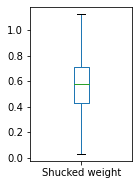

In [27]:
#5. Shucked weight
q1 = aba['Shucked weight'].quantile(.25)
q3 = aba['Shucked weight'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)

#removing outliers

aba['Shucked weight'] = np.where(
    aba['Shucked weight'] > high_range,
    high_range,
    np.where(
        aba['Shucked weight'] < low_range,
        low_range,
        aba['Shucked weight']
    )
)

#checking for the same graphically using the box plot
aba['Shucked weight'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

25 quartile of is: 0.3057776970284131
75 quartile of is: 0.5029910535983717
The IQR value is: 0.1972133565699586
The high value is 0.7988110884533096
The low value is 0.009957662173475212


Viscera weight    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

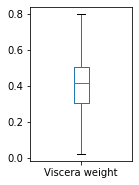

In [28]:
#6. Viscera Weight
q1 = aba['Viscera weight'].quantile(.25)
q3 = aba['Viscera weight'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)

#removing outliers

aba['Viscera weight'] = np.where(
    aba['Viscera weight'] > high_range,
    high_range,
    np.where(
        aba['Viscera weight'] < low_range,
        low_range,
        aba['Viscera weight']
    )
)

#checking for the same graphically using the box plot
aba['Viscera weight'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

25 quartile of is: 0.36055512754639896
75 quartile of is: 0.5735852159879994
The IQR value is: 0.21303008844160043
The high value is 0.8931303486504001
The low value is 0.04100999488399831


Shell weight    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

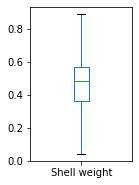

In [29]:
#7. Shell weight
q1 = aba['Shell weight'].quantile(.25)
q3 = aba['Shell weight'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)

#removing outliers

aba['Shell weight'] = np.where(
    aba['Shell weight'] > high_range,
    high_range,
    np.where(
        aba['Shell weight'] < low_range,
        low_range,
        aba['Shell weight']
    )
)

#checking for the same graphically using the box plot
aba['Shell weight'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

25 quartile of is: 2.8284271247461903
75 quartile of is: 3.3166247903554
The IQR value is: 0.4881976656092095
The high value is 4.048921288769214
The low value is 2.096130626332376


Rings    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

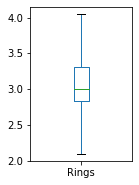

In [30]:
#8. Rings (Label)
q1 = aba['Rings'].quantile(.25)
q3 = aba['Rings'].quantile(.75)
print("25 quartile of is:",q1)
print("75 quartile of is:",q3)

iqr = q3 - q1
print("The IQR value is:",iqr)

high_range = q3 + (1.5*iqr)  
low_range = q1 - (1.5*iqr)
print("The high value is",high_range)
print("The low value is",low_range)

#removing outliers

aba['Rings'] = np.where(
    aba['Rings'] > high_range,
    high_range,
    np.where(
        aba['Rings'] < low_range,
        low_range,
        aba['Rings']
    )
)

#checking for the same graphically using the box plot
aba['Rings'].plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

Length               AxesSubplot(0.125,0.71587;0.0945122x0.16413)
Diameter          AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
Height            AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
Whole weight      AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
Shucked weight    AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
Viscera weight    AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
Shell weight      AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
Rings               AxesSubplot(0.125,0.518913;0.0945122x0.16413)
dtype: object

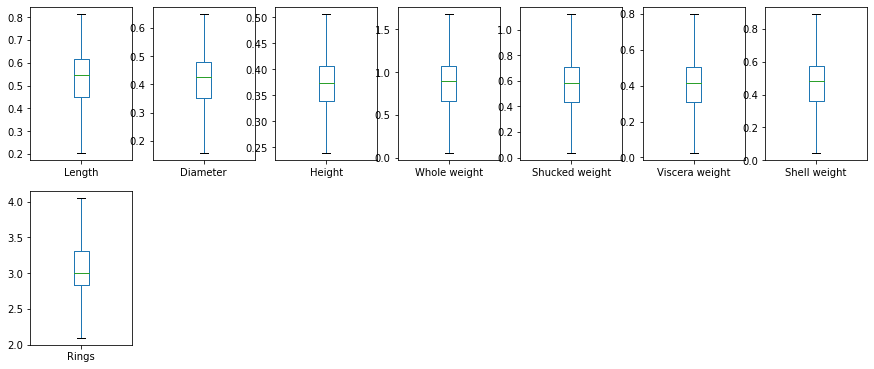

In [31]:
aba.plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

Outliers Removed successfully from the dataset. 

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
aba["Sex"] = le.fit_transform(aba['Sex'])
aba

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.308221,0.716938,0.473814,0.317805,0.387298,3.872983
1,2,0.350,0.265,0.300000,0.474868,0.315436,0.220227,0.264575,2.645751
2,0,0.530,0.420,0.367423,0.822800,0.506458,0.376165,0.458258,3.000000
3,2,0.440,0.365,0.353553,0.718331,0.464220,0.337639,0.393700,3.162278
4,1,0.330,0.255,0.282843,0.452769,0.299166,0.198746,0.234521,2.645751
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.406202,0.941807,0.608276,0.488876,0.498999,3.316625
4173,2,0.590,0.440,0.367423,0.982853,0.662571,0.463141,0.510392,3.162278
4174,2,0.600,0.475,0.452769,1.084435,0.724914,0.536190,0.554977,3.000000
4175,0,0.625,0.485,0.387298,1.046184,0.728697,0.510882,0.544059,3.162278


So, we can see that sex columns is now converted to numerical and we can see random values assigned using encoder:
    
1. Male = 2
2. Female = 0, and 
3. Infant = 1

In [33]:
aba['Age'] = " "
aba['Age'] = aba['Rings']
aba['Age'] = aba['Age'] + 1.5
aba_new = aba.drop(['Rings'], axis = 1)
aba_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.308221,0.716938,0.473814,0.317805,0.387298,5.372983
1,2,0.350,0.265,0.300000,0.474868,0.315436,0.220227,0.264575,4.145751
2,0,0.530,0.420,0.367423,0.822800,0.506458,0.376165,0.458258,4.500000
3,2,0.440,0.365,0.353553,0.718331,0.464220,0.337639,0.393700,4.662278
4,1,0.330,0.255,0.282843,0.452769,0.299166,0.198746,0.234521,4.145751
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.406202,0.941807,0.608276,0.488876,0.498999,4.816625
4173,2,0.590,0.440,0.367423,0.982853,0.662571,0.463141,0.510392,4.662278
4174,2,0.600,0.475,0.452769,1.084435,0.724914,0.536190,0.554977,4.500000
4175,0,0.625,0.485,0.387298,1.046184,0.728697,0.510882,0.544059,4.662278


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

aba_final = pd.DataFrame(scaler.fit_transform(aba_new), columns = aba_new.columns)

In [35]:
aba_final

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,1.151980,-0.583117,-0.440884,-1.169903,-0.505760,-0.473793,-0.613002,-0.508468,1.705495
1,1.151980,-1.465694,-1.459762,-1.325984,-1.342821,-1.283031,-1.322802,-1.317536,-1.007955
2,-1.280690,0.047295,0.119499,-0.045854,-0.139695,-0.306998,-0.188481,-0.040661,-0.224700
3,1.151980,-0.709200,-0.440884,-0.309197,-0.500941,-0.522817,-0.468727,-0.466262,0.134102
4,-0.064355,-1.633804,-1.561650,-1.651740,-1.419239,-1.366166,-1.479060,-1.515673,-1.007955
...,...,...,...,...,...,...,...,...,...
4172,-1.280690,0.341487,0.425163,0.690411,0.271823,0.213244,0.631403,0.227932,0.475368
4173,1.151980,0.551624,0.323275,-0.045854,0.413758,0.490663,0.444203,0.303042,0.134102
4174,1.151980,0.635679,0.679882,1.574558,0.765023,0.809207,0.975574,0.596977,-0.224700
4175,-1.280690,0.845817,0.781770,0.331499,0.632751,0.828540,0.791474,0.524994,0.134102


So, till now we have gone ahead and added a new column names age, whose values are rings values + 1.5 which gives us the age of the abalone. Also, as we have to predict the age which we have so we have dropeed the rings column so now our label is age. 

Let's check the heatmap for the new dataset.

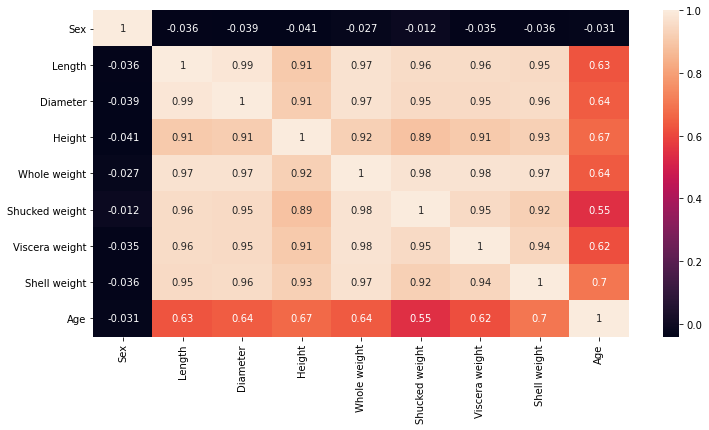

In [45]:
plt.figure(figsize=(12,6))
sns.heatmap(aba_final.corr(), annot = True)
plt.show()

From above graph we can get same results as before and we can see that our label: AGe is higvhly corelated to each columns.

In [48]:
x = aba_final.iloc[:,1:8]

In [49]:
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-0.583117,-0.440884,-1.169903,-0.505760,-0.473793,-0.613002,-0.508468
1,-1.465694,-1.459762,-1.325984,-1.342821,-1.283031,-1.322802,-1.317536
2,0.047295,0.119499,-0.045854,-0.139695,-0.306998,-0.188481,-0.040661
3,-0.709200,-0.440884,-0.309197,-0.500941,-0.522817,-0.468727,-0.466262
4,-1.633804,-1.561650,-1.651740,-1.419239,-1.366166,-1.479060,-1.515673
...,...,...,...,...,...,...,...
4172,0.341487,0.425163,0.690411,0.271823,0.213244,0.631403,0.227932
4173,0.551624,0.323275,-0.045854,0.413758,0.490663,0.444203,0.303042
4174,0.635679,0.679882,1.574558,0.765023,0.809207,0.975574,0.596977
4175,0.845817,0.781770,0.331499,0.632751,0.828540,0.791474,0.524994


In [50]:
y = aba_final.iloc[:,-1]
y

0       1.705495
1      -1.007955
2      -0.224700
3       0.134102
4      -1.007955
          ...   
4172    0.475368
4173    0.134102
4174   -0.224700
4175    0.134102
4176    0.801444
Name: Age, Length: 4177, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 45)

In [58]:
dtc = DecisionTreeRegressor()

In [59]:
dtc.fit(x_train,y_train)

DecisionTreeRegressor()

In [60]:
pred_dtc = dtc.predict(x_test)

In [61]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Error Calculations: -')

print('Means absolute error', mean_absolute_error(y_test,pred_dtc))
print('Means Squared Error',mean_squared_error(y_test,pred_dtc))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pred_dtc)))

Error Calculations: -
Means absolute error 0.6561864409529352
Means Squared Error 0.7680235287815792
Root mean square 0.876369516118389
